1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

True
Based on the images below, it is clear to see that theses features are correlated


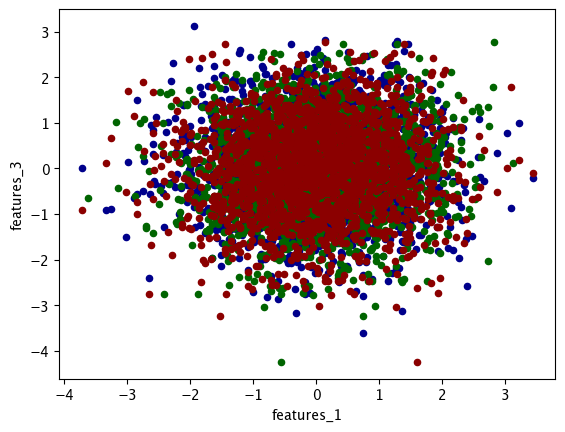

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def spottingCorrelations():
    # Read the data
    df = pd.read_csv('regression_generated.csv')
    #print(df.head(5))

    #x = df.plot.scatter(x='features_1', y='features_2', c='DarkBlue')
    #y = df.plot.scatter(x='features_2', y='features_3', c='DarkGreen')
    #z = df.plot.scatter(x='features_1', y='features_3', c='DarkRed')

    ax1 = df.plot(kind='scatter', x='features_1', y='features_2', c='DarkBlue')    
    ax2 = df.plot(kind='scatter', x='features_2', y='features_3', c='DarkGreen', ax=ax1)    
    ax3 = df.plot(kind='scatter', x='features_1', y='features_3', c='DarkRed',ax=ax1)
    print(ax1 == ax2 == ax3)
    print('Based on the images below, it is clear to see that theses features are correlated') 
    

spottingCorrelations()

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

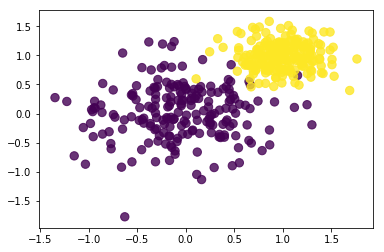

In [2]:
from IPython.display import Image
Image('images/two_categories_scatter_plot.png')

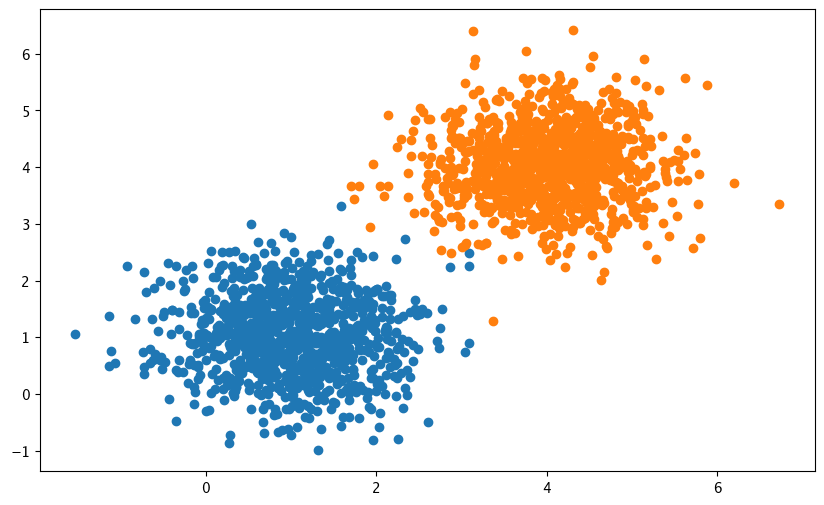

In [3]:

def colorCodedScatterPlot():
    arr_1 = np.random.normal(1, 0.7,size=(1000, 1000))
    arr_2 = np.random.normal(4, 0.7, size=(1000, 1000))
    
    fig = plt.figure(figsize=(10, 6))
    plt.scatter(arr_1[0], arr_1[1])
    plt.scatter(arr_2[0], arr_2[1])

colorCodedScatterPlot()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

3.1 Convert the content to a Pandas DataFrame
3.2 Clean the sample by removing the residal values that are bigger than 2
    residuals  distances
0    1.100000       16.0
1   -1.950000        6.3
8   -0.042857        3.3
9    0.128571        5.3
10   0.085714       15.0
3.3 Plot the data using jointplot


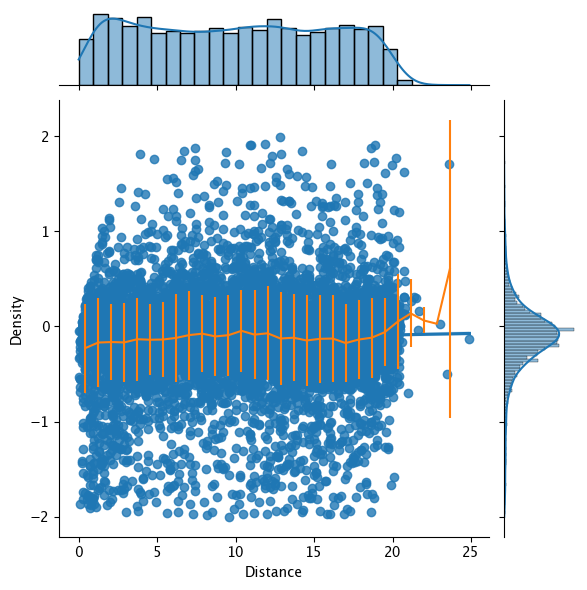

In [6]:

def profilePlot():
    unpickled_arr = pd.read_pickle('residuals_261.pkl') 
    #print(unpickled_arr)
    print('3.1 Convert the content to a Pandas DataFrame')
    df = pd.DataFrame(unpickled_arr.tolist())
    #print(df.head(5))
    print('3.2 Clean the sample by removing the residal values that are bigger than 2')
    df= df[df['residuals'].abs()<2]
    print(df.head(5))

    print('3.3 Plot the data using jointplot')
    sns.jointplot(x='distances', y='residuals', data=df, kind='reg')

    h, bins, _ = plt.hist(df['distances'],bins=30, density=True, cumulative=False)
    plt.xlabel('Distance')
    plt.ylabel('Density')
    #print('bins: ', len(bins))
    x = ( bins[:-1]+bins[1:]) / 2
    #print('3.3 The array of bin centers is: ',x)
    #print(list(zip(x[:-1], x[1:])))
    #print('3.4 The mean values of the "residuals',y)
    #print('3.5 The standard deviation of the "residuals',err_y)
    y = []
    err_y = []
    for i in range(len(x)-1):
        y.append(df[(df['distances'] > bins[i]) & (df['distances'] < bins[i+1])]['residuals'].mean())
        err_y.append(df[(df['distances'] > bins[i]) & (df['distances'] < bins[i+1])]['residuals'].std())
    #print('3.4 The mean values of the "residuals',y)
    #print('3.5 The standard deviation of the "residuals',err_y)

    #print(len(x), len(y), len(err_y))

    plt.errorbar(x[:-1], y, yerr=err_y,  fmt='', ecolor=None, elinewidth=None, capsize=0)



    
profilePlot()

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


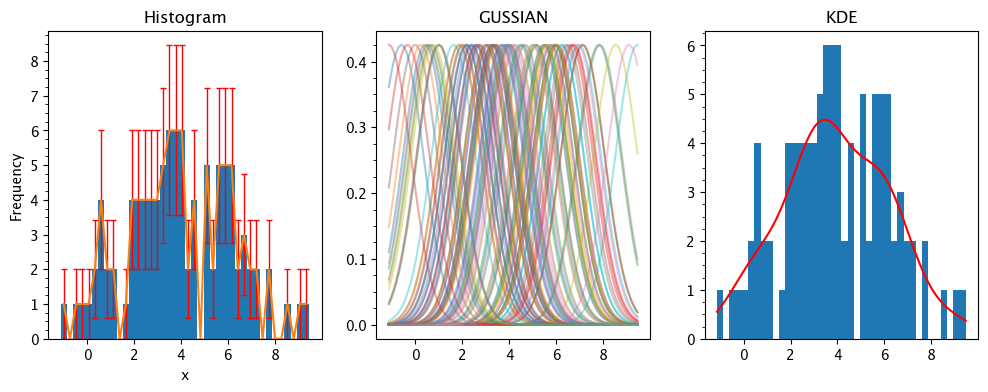

In [7]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from scipy.stats import norm
import scipy

def KDE():
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
    x = np.random.normal(4, 2, 100)
    #print(x)
    bins = ax1.hist(x, bins=40, density=False, cumulative=False)
    ax1.set_title('Histogram')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Frequency')
    ax1.yaxis.tick_left()
    ax1.yaxis.set_minor_locator(AutoMinorLocator(4))
    binscenter = 0.5*(bins[1][1:]+bins[1][:-1])
    error_x = np.sqrt(bins[0])
    ax1.errorbar(binscenter, bins[0], yerr=error_x, fmt='', ecolor='red', elinewidth=1, capsize=2)

    std = 1.06 *x.std()*(x.size**(-1/5))
    #print(std)
    x_grid = np.linspace(np.min(x),np.max(x),100)
    #print(x_grid)

    gussian = []
    for i in x:
        g=scipy.stats.norm.pdf(x_grid, i, scale=std)
        gussian.append(g)
        ax2.plot(x_grid, g, alpha=0.4)
    #print(gussian)

        
    ax2.set_title('GUSSIAN')
    ax2.yaxis.tick_left()
    ax2.yaxis.set_minor_locator(AutoMinorLocator(4))
    
    sum_of_gussian = np.sum(gussian, axis=0)
    #print(sum.size)
    Integrate = scipy.integrate.trapz(sum_of_gussian, x_grid)
    hist = sum(np.diff(bins[1])*bins[0])
    norm = Integrate/hist
    norm_sum_of_gussian = sum_of_gussian/norm

    ax3.set_title('KDE')
    ax3.plot(x_grid, norm_sum_of_gussian, color='red')
    ax3.hist(x, bins=40, density=False)
    ax3.yaxis.tick_left()
    ax3.yaxis.set_minor_locator(AutoMinorLocator(4))






    #print(counts)
    #print(bins)



KDE()